In [27]:
import pandas as pd

main_data = pd.read_csv(r"C:\Users\Taha\Desktop\Folder\QBTC-Divar-Project\Datas\final_pre_last.csv")

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Remove the limitation of showing Columns

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [30]:
main_data.columns

Index(['cat3_slug', 'city_slug', 'neighborhood_slug', 'land_size',
       'building_size', 'deed_type', 'has_business_deed', 'floor',
       'rooms_count', 'construction_year', 'is_rebuilt', 'location_latitude',
       'location_longitude', 'big_city', 'luxury', 'basic', 'extra_features',
       'lat', 'long', 'easting', 'northing', 'zone_number', 'zone_letter',
       'adjusted_price_value'],
      dtype='object')

In [31]:
train_data = main_data.sample(n=50000, random_state=42)

In [32]:
train_data

,cat3_slug,city_slug,neighborhood_slug,land_size,building_size,deed_type,has_business_deed,floor,rooms_count,construction_year,is_rebuilt,location_latitude,location_longitude,big_city,luxury,basic,extra_features,lat,long,easting,northing,zone_number,zone_letter,adjusted_price_value
73250,apartment-rent,tehran,shahrak-e-jandarmeri,250.000000,150.0,unselect,False,2,دو,1369.0,True,35.729519,51.362637,1,0,2,2,35,51,532794.883732,3.954009e+06,39,S,1.166667e+10
22482,house-villa-rent,tabriz,unknown,90.000000,90.0,unselect,False,NaN,دو,1382.0,False,38.021778,46.362011,1,0,1,2,38,46,619548.294512,4.209107e+06,38,S,3.888889e+09
258089,apartment-rent,tehran,sarsabz,106.666667,64.0,unselect,False,2,دو,1393.0,False,35.733658,51.499100,1,0,2,3,35,51,545133.623247,3.954523e+06,39,S,8.333333e+09
349430,shop-rent,tehran,tehransar,36.666667,22.0,unselect,False,NaN,بدون اتاق,1378.0,False,35.691338,51.258289,1,0,1,0,35,51,523369.404416,3.949745e+06,39,S,7.500000e+09
291062,apartment-rent,mashhad,daneshjoo,258.333333,155.0,unselect,False,3,سه,1391.0,False,36.335655,59.505363,1,0,2,0,36,59,724863.243414,4.024093e+06,40,S,7.805556e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17929,house-villa-rent,borujerd,borujerd,60.000000,200.0,unselect,False,NaN,یک,1390.0,True,33.929787,48.749714,0,0,3,3,33,48,291999.818271,3.756652e+06,39,S,1.388889e+09
3792,apartment-sell,tehran,chitgar-lake,175.000000,105.0,unselect,False,10,دو,1398.0,False,35.747906,51.191540,1,1,4,3,35,51,517317.808481,3.956005e+06,39,S,9.916667e+09
145405,plot-old,sijval,sijval,166.666667,100.0,unselect,False,NaN,NaN,NaN,False,36.903152,54.194168,0,0,0,0,36,54,250003.724669,4.087806e+06,40,S,3.333333e+08
185289,shop-rent,parand-city,parand-city,41.666667,25.0,unselect,False,NaN,بدون اتاق,1403.0,False,35.487724,50.920666,0,0,0,0,35,50,492803.834859,3.927135e+06,39,S,5.000000e+09


In [37]:
column = ['adjusted_price_value','easting','zone_number','northing']
# column = ['adjusted_price_value', 'easting', 'northing']
scaler = StandardScaler()

try:
    X_scaled = scaler.fit_transform(train_data[column])
except ValueError as e:
    print("Error during scaling:", e)
    raise


Modeling and Train

In [38]:
dbscan = DBSCAN(min_samples=300, eps=1.77)
clusters = dbscan.fit_predict(X_scaled)
print(np.unique(clusters, return_counts=True))


(array([-1,  0,  1,  2]), array([  338, 38460,  4157,  7045]))


In [39]:
train_data['cluster'] = clusters


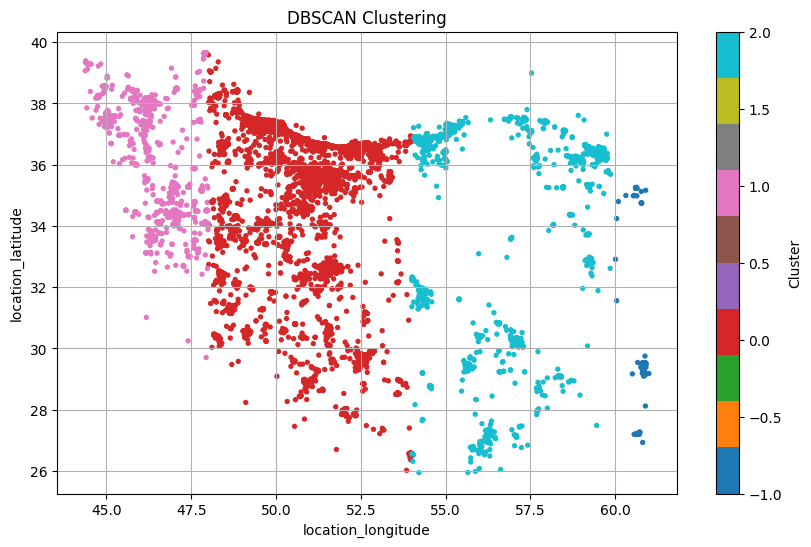

In [40]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_data['location_longitude'], train_data['location_latitude'], c=train_data['cluster'], cmap='tab10',s=8)

plt.title("DBSCAN Clustering")
plt.xlabel("location_longitude")
plt.ylabel("location_latitude")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()
